## Log-likelihood

In [88]:
df21 = getDF(2, 1) 
data_val_cls = df21.real_cls

17614-element Vector{Int64}:
 15
  5
  1
  1
  1
  4
  3
  2
  2
  1
  1
  2
  6
  ⋮
 13
 12
 11
 11
 15
 18
 20
 23
 25
 25
 32
 38

In [15]:
function loglike(nc)
    N = nc
    data_train_cls, binStarts, binMean = getBins(data_train, N) 
    df21 = getDF(2, 1; n=N, data_train_cls=data_train_cls, binStarts=binStarts, binMean=binMean) 

    data_val_cls = df21.real_cls
    tr = fit(Normal, data_train_cls)
    return loglikelihood(tr, data_val_cls)
end

loglike (generic function with 1 method)

In [23]:
lolis = []
for nc in 5:5:40
    loli = loglike(nc)
    push!(lolis, loli)
end

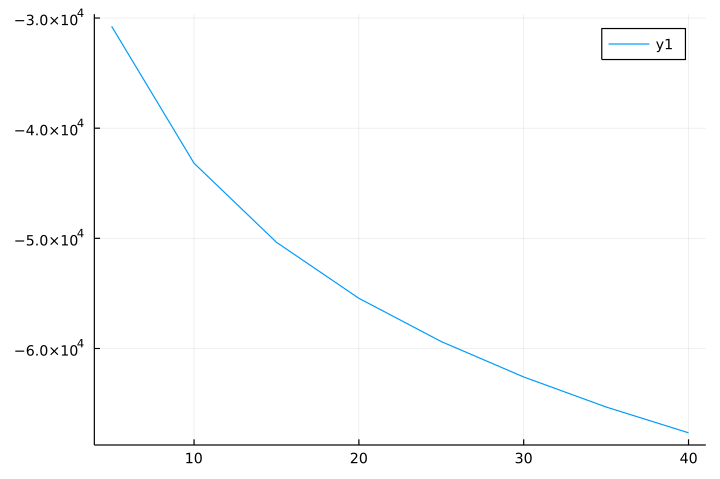

In [49]:
plot(5:5:40, lolis) 

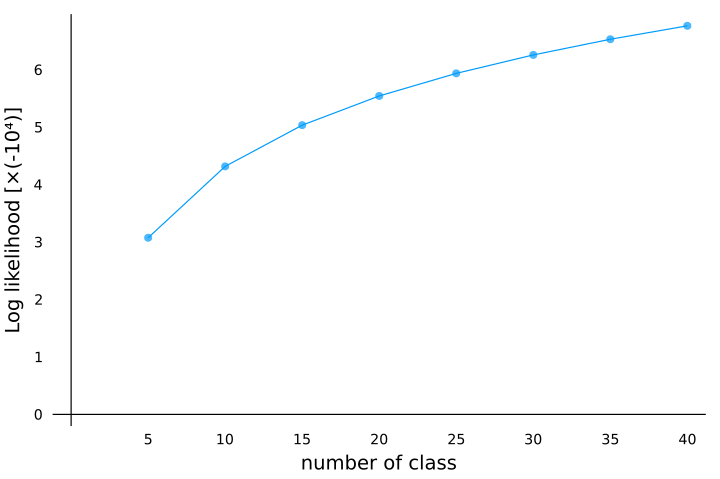

In [57]:
plot(5:5:40, lolis./(-10^4), marker=(0.7, stroke(0)), leg=false, frame=:zerolines, grid=:none, 
    xticks=5:5:40, xlabel="number of class", ylabel="Log likelihood [×(-10⁴)]")

In [83]:
function llh(nc) # num_cls
    data_train_cls, binStarts, binMean = getBins(data_train, nc) 
    return loglikelihood(Normal(), data_train_cls)
end

llh (generic function with 1 method)

In [89]:
nc = 2:2:30
llhs = Float64[]
for n in nc
    push!(llhs, llh(n))
end
llhs

15-element Vector{Float64}:
 -580423.8840553071
      -1.24944238405531e6
      -2.275277884055311e6
      -3.657908384055311e6
      -5.397357884055309e6
      -7.493629384055279e6
      -9.946683884055227e6
      -1.2756564384055194e7
      -1.5923327884055194e7
      -1.9446750384055227e7
      -2.3327043884055242e7
      -2.7564205384055242e7
      -3.21581138840552e7
      -3.710885038405514e7
      -4.241642988405506e7

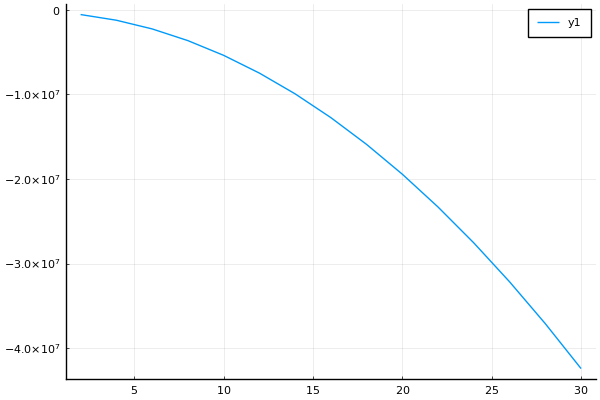

In [90]:
plot(nc, llhs)

In [28]:
llhTr = loglikelihood(Normal(), data_train)

-313009.91146532213

In [51]:
te = fit(Normal, data_test)

Normal{Float64}(μ=0.6905375446529478, σ=0.2561302274954425)

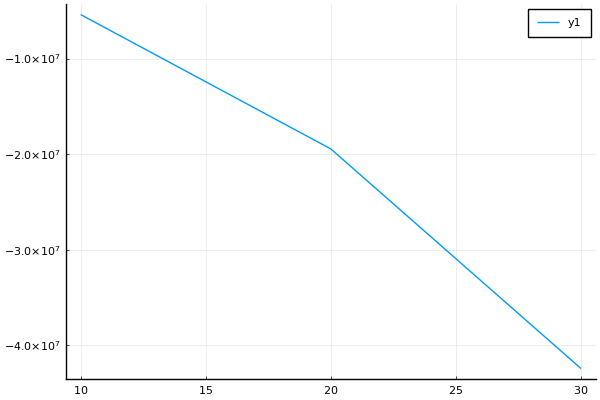

In [75]:
plot([10,20,30],[llhTr_10, llhTr_20, llhTr], )

In [68]:
logpdf(Normal(), data_test_cls)

17979-element Vector{Float64}:
  -41.418938533204674
  -41.418938533204674
   -5.418938533204673
   -1.4189385332046727
   -1.4189385332046727
   -1.4189385332046727
   -2.9189385332046727
   -2.9189385332046727
   -1.4189385332046727
   -1.4189385332046727
   -1.4189385332046727
   -1.4189385332046727
   -1.4189385332046727
    ⋮
  -32.918938533204674
  -25.418938533204674
  -25.418938533204674
  -25.418938533204674
  -41.418938533204674
  -61.418938533204674
  -72.91893853320467
  -98.91893853320467
 -113.41893853320467
 -113.41893853320467
 -181.41893853320468
 -265.41893853320465

In [60]:
logTr = logpdf(tr, data_train)

267607-element Vector{Float64}:
 -0.7390725965514602
 -0.749636184929457
 -0.9240713626038126
 -1.1783234851667956
 -1.3893323379861149
 -1.2883715572680885
 -0.26993290455632035
 -0.40655707004413544
 -0.19677151570201512
 -0.006964715412618672
 -0.5507346893012293
 -0.790886722827745
 -0.8046691133606088
  ⋮
 -0.3562744655647867
  0.05127298864727248
  0.19662686395729168
  0.039839927341740244
  0.3414563485281543
  0.33286117071197285
  0.35213004425142935
  0.14783879409896383
  0.12340973285210421
  0.21045757875799098
 -0.0026369544943598555
 -0.23750603510277846

In [53]:
llhTe = logpdf(te, data_test)

17979-element Vector{Float64}:
 -0.01752145846402109
 -0.05392801107719092
 -0.9083831516752008
 -1.6166132243464204
 -1.8422429123577257
 -1.7731328475780017
 -1.1029431387500688
 -1.1918485209662328
 -1.5216937402817672
 -1.5312426498579461
 -1.5428315219895616
 -1.5583213354757561
 -1.507881985765142
  ⋮
 -0.18503293299388468
 -0.33449135055410495
 -0.43436536144009863
 -0.36235717492673625
 -0.06179274438676452
  0.18161563814145
  0.3685574836507881
  0.4324253778135221
  0.43816881306510924
  0.43894165551833586
  0.2911193421612708
  0.05236366690123817

In [24]:
logliTe = log.(data_test)

17979-element Vector{Float64}:
 -0.8103734477009982
 -0.8320374233083325
 -1.3114217087068083
 -1.7679514969989036
 -1.9452681132189922
 -1.8885433055480856
 -1.4265113346931475
 -1.4811477213458324
 -1.6993526023968981
 -1.7061165219644234
 -1.7143651820632337
 -1.7254596994732307
 -1.689620593135623
  ⋮
 -0.9076992528436422
 -0.9912325096523066
 -1.0463249255396996
 -1.0066360789490105
 -0.8366726777590361
 -0.6825989110544289
 -0.5248884431861042
 -0.4260869537570588
 -0.33400131949324074
 -0.33689792777871597
 -0.1842073784687699
 -0.08668272175935691

## K-S score

In [17]:
using HypothesisTests

In [10]:
function std_nc(nc)

In [21]:
    nc = 20
    data_train_cls, binStarts, binMean = getBins(data_train, nc) 
    df21 = getDF(2, 1; n=nc, data_train_cls=data_train_cls, binStarts=binStarts, binMean=binMean)
    ApproximateTwoSampleKSTest(data_train_cls, df21.real_cls)

┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests C:\Users\xinyuan.hou\.julia\packages\HypothesisTests\V7PST\src\kolmogorov_smirnov.jl:167


Approximate two sample Kolmogorov-Smirnov test
----------------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.10666

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations:   [267607,17614]
    KS-statistic:              13.711618057253975


## reliability

In [84]:
data_train_cls, binStarts, binMean = getBins(data_train, N; op="el")
data_test_cls = classify(data_test, binStarts);

In [72]:
data_train_cls, binStarts, binMean = getBins(data_train, 20) # city-specific
data_test_cls = classify(data_test, binStarts);

In [59]:
df22_ = getDF(2, 2, 10)

,real,neib,pers,real_cls,pers_cls,dif_pers,dif_cls_pers,pred,pred_cls,dif_pred,dif_cls_pred,dif_neib,pred_n,pred_cls_n,dif_pred_n,dif_cls_pred_n
,Float64,Float64,Float64,Int64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Float64,Int64,Float64,Int64
1,0.170682,0.812441,0.435162,1,3,0.264479,2,0.423986,3,0.253304,2,0.641759,0.423986,3,0.253304,2
2,0.142949,0.577954,0.269437,1,1,0.126488,0,0.304889,2,0.16194,1,0.435005,0.348972,3,0.206024,2
3,0.151292,0.40955,0.170682,1,1,0.0193902,0,0.255325,1,0.104033,0,0.258258,0.255325,1,0.104033,0
4,0.240145,0.188798,0.142949,1,1,-0.0971964,0,0.255325,1,0.0151802,0,-0.0513477,0.255325,1,0.0151802,0
5,0.227377,0.147695,0.151292,1,1,-0.0760845,0,0.255325,1,0.0279489,0,-0.0796814,0.255325,1,0.0279489,0
6,0.182802,0.13582,0.240145,1,1,0.0573434,0,0.255325,1,0.0725236,0,-0.0469821,0.255325,1,0.0725236,0
7,0.18157,0.144917,0.227377,1,1,0.045807,0,0.255325,1,0.0737559,0,-0.0366527,0.255325,1,0.0737559,0
8,0.180078,0.117192,0.182802,1,1,0.00272383,0,0.255325,1,0.0752474,0,-0.0628862,0.255325,1,0.0752474,0
9,0.178091,0.100783,0.18157,1,1,0.00347838,0,0.255325,1,0.0772343,0,-0.0773083,0.255325,1,0.0772343,0


In [75]:
pred_mn = [mean(g.pred) for g in gb]

20-element Vector{Float64}:
 0.14084055614575133
 0.23249875022559488
 0.28201282023300206
 0.3217413116455796
 0.3660832413466893
 0.41900521758231246
 0.4902873336648194
 0.5575062973647888
 0.6316480865296256
 0.6976245665390056
 0.7491000426796237
 0.794887204472707
 0.8308882790136427
 0.8653985936281534
 0.8964601266934766
 0.9223060151922436
 0.9429164523099903
 0.9513919894226467
 0.9560118575740151
 0.972139231128456

In [76]:
len = length(gb)
rFs = zeros(len)
for i in 1:len
    g = gb[i]
    sdf = filter([:real_cls, :pred_cls] => (r, p) -> isequal(r, p), g)
    rFs[i] = size(sdf, 1) / size(g, 1)
end
rFs

20-element Vector{Float64}:
 0.3333333333333333
 0.22653721682847897
 0.20754716981132076
 0.19408740359897173
 0.16301969365426697
 0.1730612244897959
 0.1797884841363102
 0.1699530516431925
 0.16414435389988358
 0.14823261117445838
 0.17129977460555973
 0.20519713261648745
 0.14142049025769957
 0.1185929648241206
 0.06594773952716715
 0.0926517571884984
 0.5937961595273265
 0.5800524934383202
 0.6244444444444445
 1.0

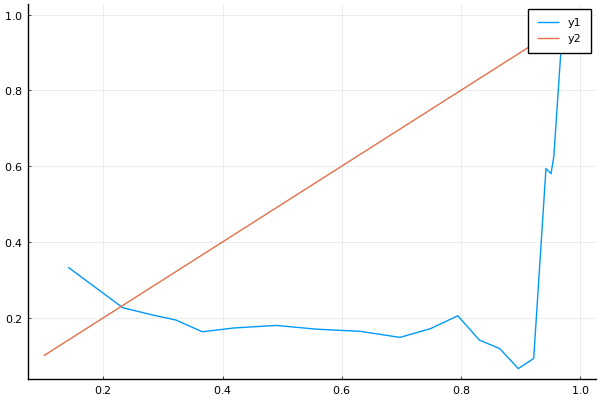

In [79]:
plot(pred_mn, rFs)
plot!(0.1:0.1:1, 0.1:0.1:1)

## GHI

In [53]:
dfm = dff[1:14, :]
tm = Dates.format.(dfm.time, "HH:MM")
tmTick = tm[1:10:100]

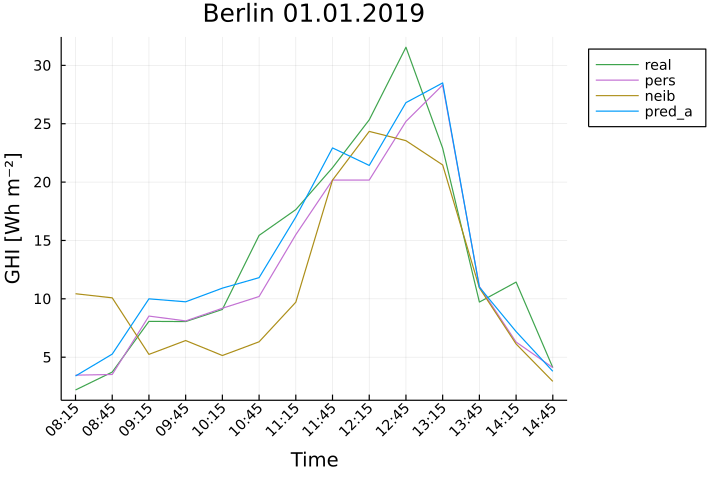

In [65]:
plot([dfm.ghi dfm.ghi_pers dfm.ghi_neib dfm.ghi_pred], leg=:outertopright,
    c=[3 4 5 1], label=["real" "pers" "neib" "pred_a"], 
    xticks=(1:14, tm), xrotation=45,
    xlabel="Time", ylabel="GHI [Wh m⁻²]", title="Berlin 01.01.2019")

In [ ]:
using Distances

In [85]:
euclidean(dff.ghi, dff.ghi_pers)

1513.84900750263

In [77]:
sqeuclidean(dff.ghi, dff.ghi_neib)

1.8847884328074353e6

In [79]:
cosine_dist(dff.ghi, dff.ghi_pers)

0.0045423139797607925

In [78]:
p1 = plot([df1.ghi df1.ghi_pers], c=[3 4], label=["real" "pers"],
    ylabel="GHI [Wh m⁻²]", title="Berlin +60 min")

p2 = plot([df1.ghi df1.ghi_pred], c=[3 1], label=["real" "pred_a"],
    ylabel="GHI [Wh m⁻²]")

p3 = plot([df1.ghi df1.ghi_pred_n], c=[3 7], label=["real" "pred_b"], xlabel="Time [15min]", 
    ylabel="GHI [Wh m⁻²]");

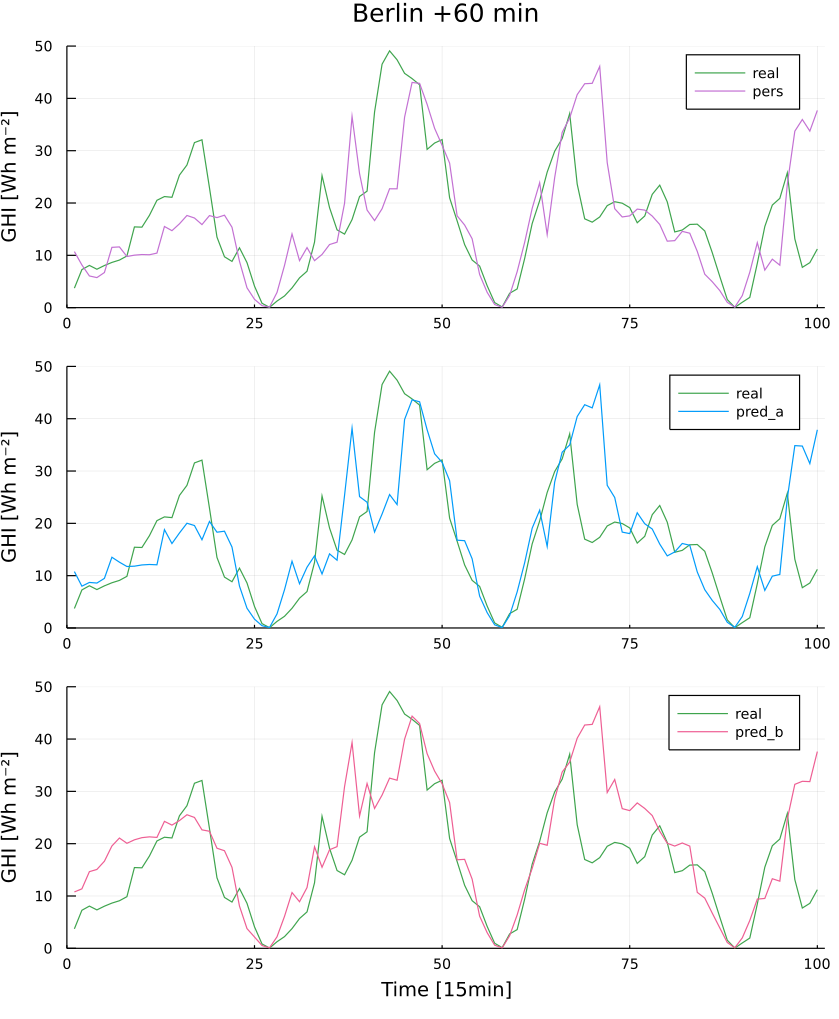

In [84]:
ps = plot(p1, p2, p3, layout=@layout([a;b;c]), xlim=(0,101), ylim=(0,50), size=(700, 850))

## scatter

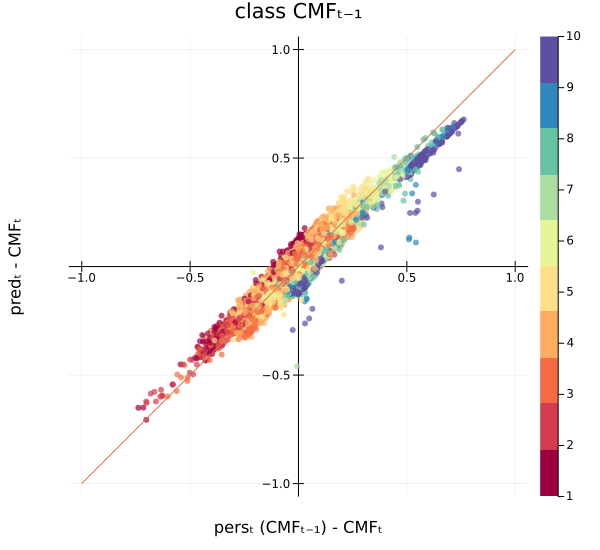

In [12]:
@df df2 scatter(:dif_pers, :dif_pred, marker_z=:real_cls_prev, frame=:origin, 
        c=palette(:Spectral_10), 
        marker=(0.7, stroke(0)), label="", fmt=:png, size=(600,550),
        xlabel="persₜ (CMFₜ₋₁) - CMFₜ", ylabel="predₜ - CMFₜ", title="class CMFₜ₋₁")
plot!(-1:1, -1:1, label="")

## dif CMF vs Err

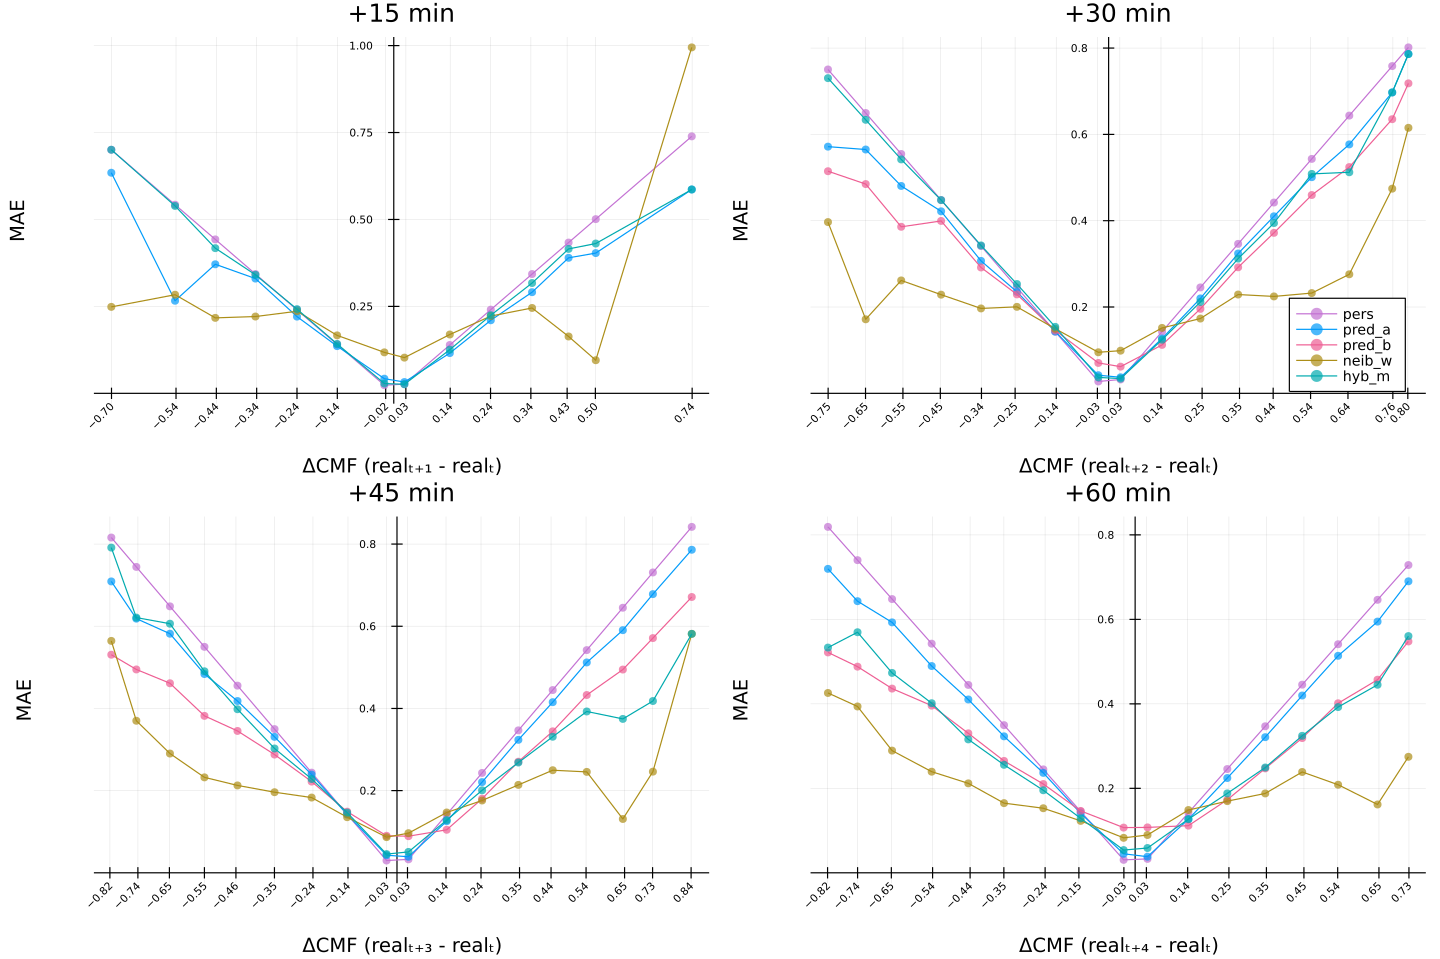

In [91]:
difs = plot(dif1, dif2, dif3, dif4, layout=@layout([a b; c d]), size=(1200, 800), #ylim=(0, 1.01), 
    leftmargin=20px, ylabel="MAE")

## pACF

In [7]:
lags = collect(0:10)
pACF_train = pacf(data_train, lags)

11-element Vector{Float64}:
  1.0
  0.8950278187353926
 -0.1297686872609787
  0.1480611713779651
  0.018718040107171124
  0.056977667039441175
  0.03379964557040376
  0.03609850297600837
  0.024416348982315227
  0.023665355381098152
  0.02077301939930371

In [47]:
pACF_val = pacf(df21.real, lags)

11-element Vector{Float64}:
  1.0
  0.8940948720849655
 -0.08497934971095177
  0.15444873019966002
  0.012469708870407515
  0.06662259356416543
  0.0393101784076488
  0.033211432608876296
  0.023266873589552758
  0.015167549424945108
  0.01583229112403721

In [11]:
σ = 1.96 / √length(data_test)

0.014617506820435396

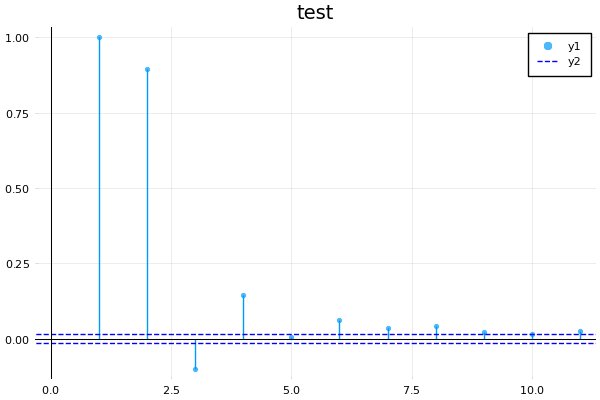

In [19]:
hline!([-σ, σ], ls=:dash, lc=:blue)

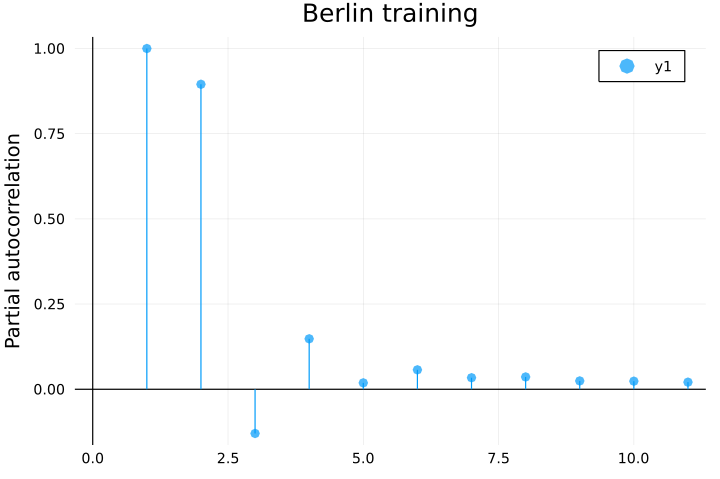

In [43]:
acfTr = plot(pACF_train, st=:stem, marker=(0.7, :o, stroke(0)), frame=:zerolines, title=city*" training", ylabel="Partial autocorrelation")

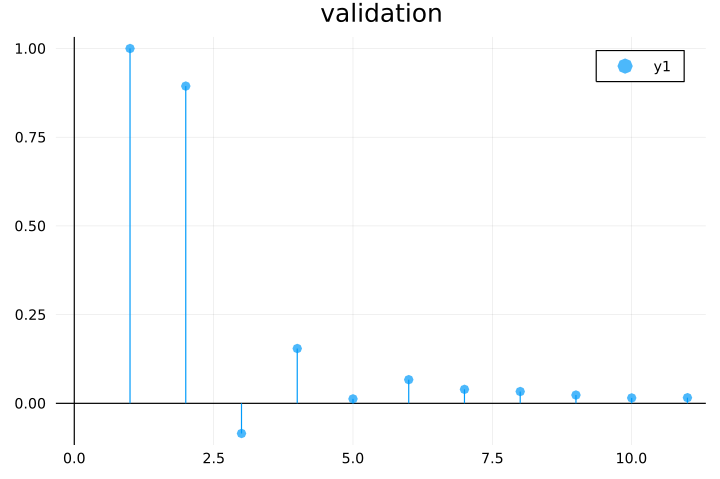

In [49]:
acfVa = plot(pACF_val, st=:stem, marker=(0.7, :o, stroke(0)), frame=:zerolines, title="validation")

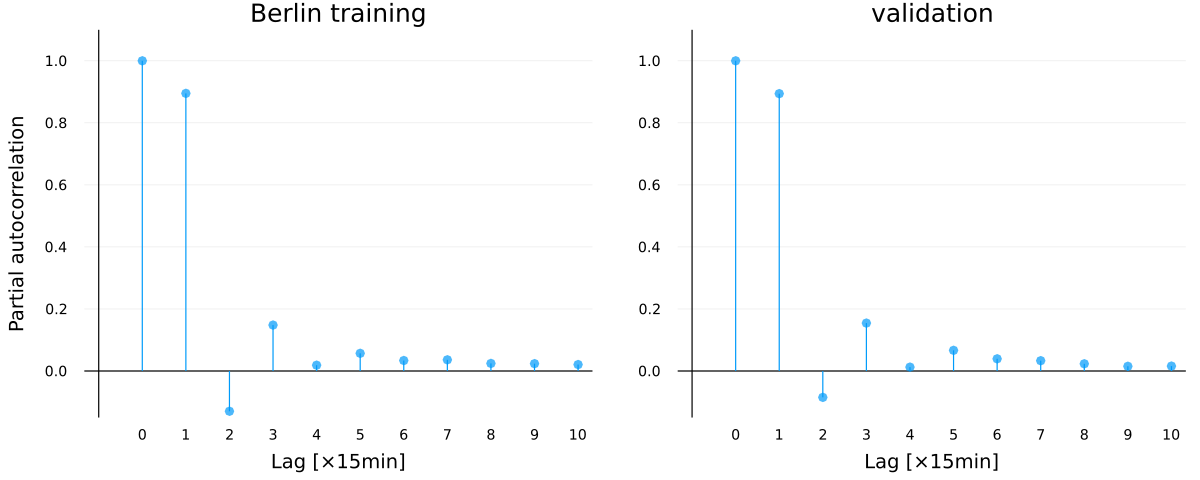

In [54]:
acfs = plot(acfTr, acfVa, layout=@layout([a b]), leg=false, frame=:zerolines, grid=:y,
    ylim=(-0.15, 1.1), xticks=(1:11, lags), yticks=-0.2:0.2:1.0, xlabel="Lag [×15min]", 
    leftmargin=20px, bottommargin=20px, size=(1000,400)) #, dpi=120)

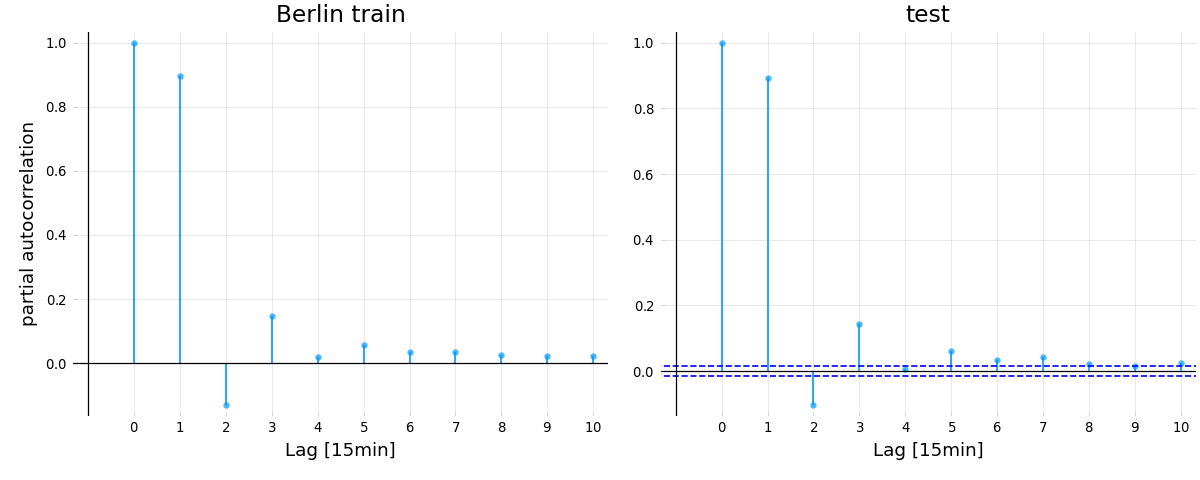

In [22]:
acfs = plot(acfTr, acfVa, layout=@layout([a b]), leg=false, frame=:zerolines, grid=:y,
    xticks=(1:11, lags), yticks=-0.2:0.2:1.0, xlabel="Lag [×15min]", 
    leftmargin=20px, bottommargin=20px) #, dpi=120, size=(1000,400))

## MAE vs RMSE

In [16]:
function getMae(df, steps)
    mae_pers = meanad(df.pers, df.real)
    mae_pred = meanad(df.pred, df.real)
    if steps == 1
        return mae_pers, mae_pred 
    else
        mae_pred_n = meanad(df.pred_n, df.real)
        df_ = filter(:dif_neib => d -> !isnan(d), copy(df))
        mae_neib = meanad(df_.neib, df_.real)
        return mae_pers, mae_pred, mae_pred_n, mae_neib
    end
end

getMae (generic function with 1 method)